<a href="https://colab.research.google.com/github/DylanGraves/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [4]:
import pandas as pd

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', names = ["Age of Patient", "Year of Operation", "Nodes Detected", "Survival"])

df.shape

# No missing data.

(306, 4)

In [6]:
df.isna().sum()

# No missing values.

Age of Patient       0
Year of Operation    0
Nodes Detected       0
Survival             0
dtype: int64

In [7]:
df.head(10)

# Seems to look good.

,Age of Patient,Year of Operation,Nodes Detected,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [0]:
df['Survival'] = df['Survival'].replace(2, 0)

In [14]:
df.head(10)

# Replaced the 2's with 0's.

,Age of Patient,Year of Operation,Nodes Detected,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [35]:
age_bins = pd.cut(df['Age of Patient'], 10)

pd.crosstab(df['Survival'], age_bins, normalize="columns")

# Just looking at this, there doesn't seem to be a large amount of correlation between age and survival, but I'll have to look more into this.

Age of Patient,"(29.947, 35.3]","(35.3, 40.6]","(40.6, 45.9]","(45.9, 51.2]","(51.2, 56.5]","(56.5, 61.8]","(61.8, 67.1]","(67.1, 72.4]","(72.4, 77.7]","(77.7, 83.0]"
Survival,,,,,,,,,,
0,0.125,0.074074,0.326087,0.301887,0.327273,0.219512,0.292683,0.222222,0.142857,1.0
1,0.875,0.925926,0.673913,0.698113,0.672727,0.780488,0.707317,0.777778,0.857143,0.0


In [21]:
node_bins = pd.cut(df['Nodes Detected'], 5)

pd.crosstab(df.Survival, node_bins, normalize="columns")

# Hmmm, interesting.

Nodes Detected,"(-0.052, 10.4]","(10.4, 20.8]","(20.8, 31.2]","(31.2, 41.6]","(41.6, 52.0]"
Survival,,,,,
0,0.218045,0.576923,0.545455,1.0,0.5
1,0.781955,0.423077,0.454545,0.0,0.5


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


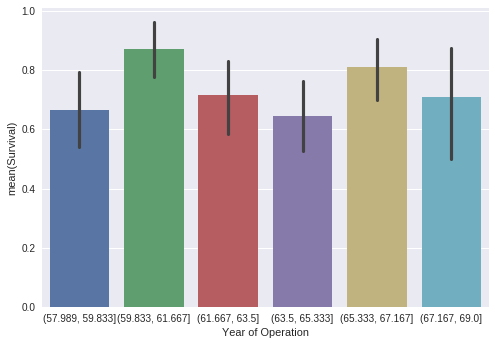

In [34]:
import seaborn as sns

year_bins = pd.cut(df['Year of Operation'], 6)

sns.barplot(x=year_bins, y=df['Survival'], data=df);

# There doesn't seem to be much correlation between the year of the operation of survival, although the data is limited to about 10 years.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


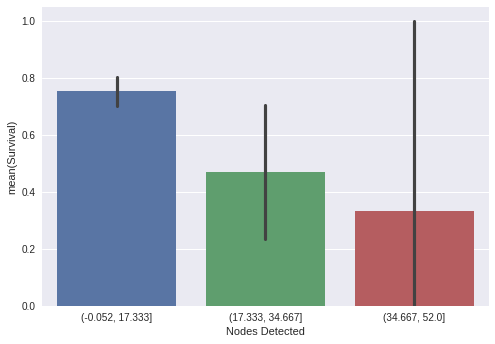

In [50]:
node_bins = pd.cut(df['Nodes Detected'], 3)

sns.barplot(node_bins, df['Survival'], data=df);

# So it appears that the more nodes one has the less likely they are to survive.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


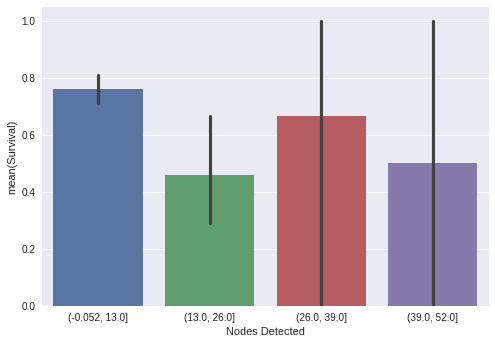

In [51]:
node_bins = pd.cut(df['Nodes Detected'], 4)

sns.barplot(node_bins, df['Survival'], data=df);

# Although if I increase the number of bins by just one, then things start to get more confused.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


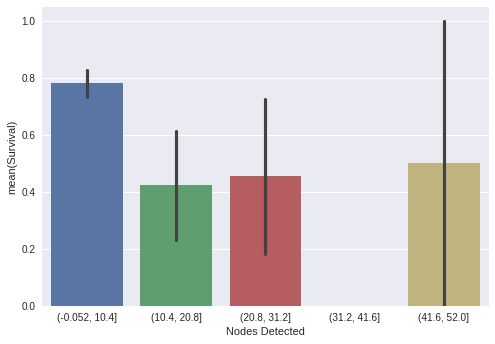

In [52]:
node_bins = pd.cut(df['Nodes Detected'], 5)

sns.barplot(node_bins, df['Survival'], data=df);

# Not as many data points as I might like.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


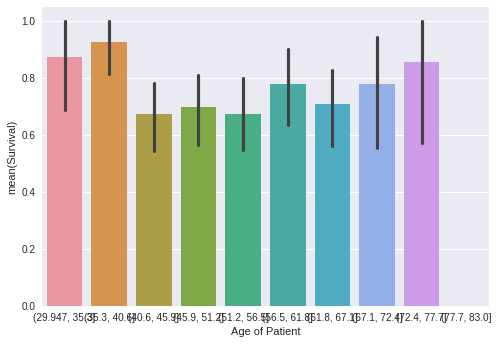

In [56]:
age_bins = pd.cut(df['Age of Patient'], 10)

sns.barplot(age_bins, df['Survival'], data=df);

# It looks like if you have the operation before you are 40 you have a good change of survival, and then survival rate drops and remains mildly stable.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


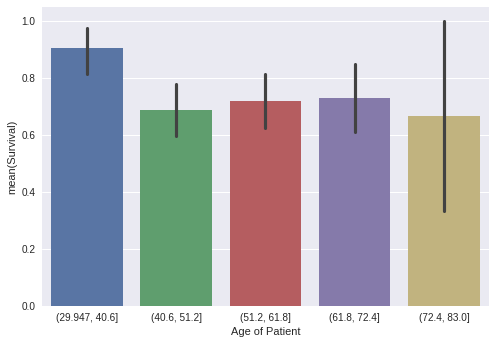

In [37]:
age_bins = pd.cut(df['Age of Patient'], 5)

sns.barplot(age_bins, df['Survival'], data=df);

# Changing how I cut up the age sections. I don't like these error bars, especially for old age, so I'm going to increase the number of bins to see how that works.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


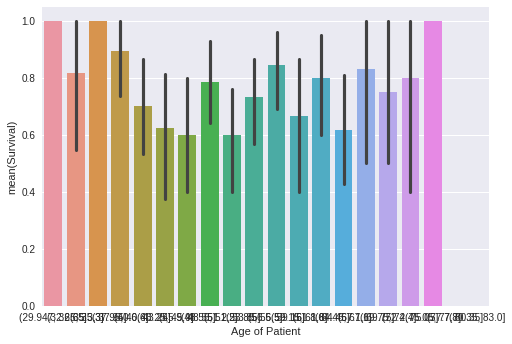

In [46]:
age_bins = pd.cut(df['Age of Patient'], 20)

sns.barplot(age_bins, df['Survival'], data=df);

# You can't really see the x axis in this graph, but the general trend is still there.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


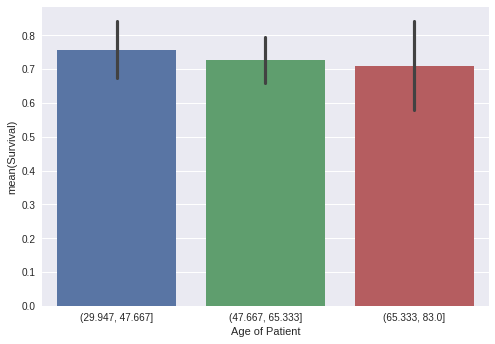

In [57]:
age_bins = pd.cut(df['Age of Patient'], 3)

sns.barplot(age_bins, df['Survival'], data=df);

# If you put all the patients into three broad bucketts, then there is a slight negative correlation between age and survival.

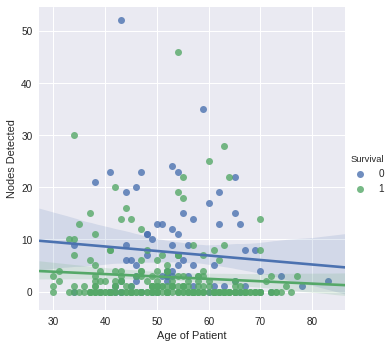

In [43]:
sns.lmplot(x = 'Age of Patient', y = 'Nodes Detected', hue="Survival", data=df);

# So it appears that regardless of age, the more nodes you have the less likely you are to survive.

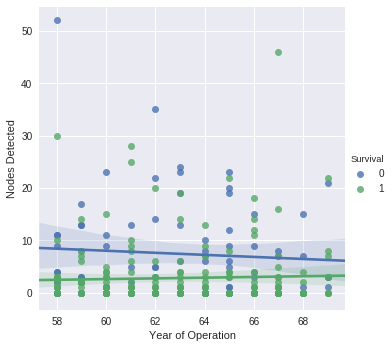

In [47]:
sns.lmplot(x = 'Year of Operation', y = 'Nodes Detected', hue="Survival", data=df);

# Again, the year of operation doesn't seem to have a huge effect on survival rate, but number of nodes does.

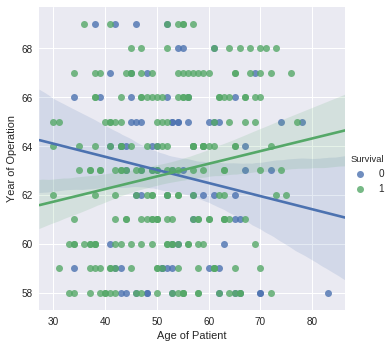

In [48]:
sns.lmplot(x = 'Age of Patient', y = 'Year of Operation', hue="Survival", data=df);

# I don't think this graph has much useful information, but I wanted to check anyway.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


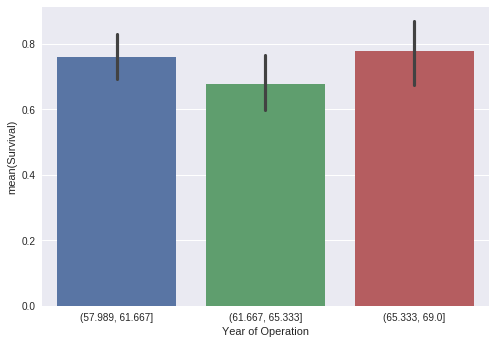

In [58]:
year_bins = pd.cut(df['Year of Operation'], 3)

sns.barplot(year_bins, df['Survival'], data=df);

# Checking again to see if there is any correlation between the year of the operation and survival rate.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


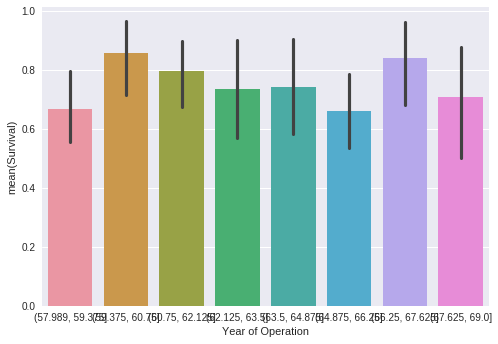

In [59]:
year_bins = pd.cut(df['Year of Operation'], 8)

sns.barplot(year_bins, df['Survival'], data=df);

# Still no clear correlation.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


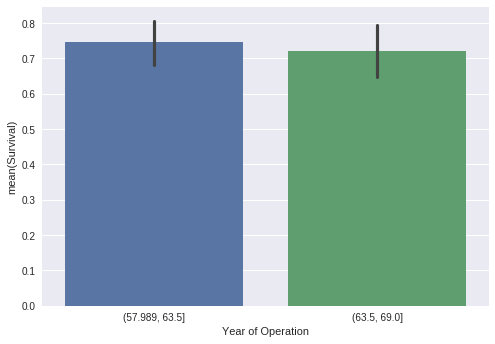

In [60]:
year_bins = pd.cut(df['Year of Operation'], 2)

sns.barplot(year_bins, df['Survival'], data=df);

# Even only putting the data into two buckets do you not see much correlation, although, interestingly, there is a very slight decrease in survival rate.
# You would expect survival to rise as medical technology improved, but there is no evidence of that here.

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

----

To begin with, there wasn't as many data points as I would have liked. Many of the correlations that you can say about the data seemed to get muddled if you "zoomed in" a little. I suppose this suggests that the correlations are not very strong, but of course more data is almost always better.

There seemed to be positive correlation with youth and survival rate. As in, the younger you are the more likely you are to survive. This makes sense  as younger people are less likely to die than older people from diseases. It's worth noting that the correlation is not strong. This could be a simple lack of data, but it is also useful to consider that if a young person gets breast cancer then that could suggest that it is a much more serious case. It is one thing to get cancer at the age of 80, it is another to get cancer at 35.

A stronger correlation is that of nodes detected. Again, the amount of data we have is not as large as I would like but it seems that the more positive axillary nodes detected the more likely you are to die in the next 5 years. This makes sense as nodes detected essentially measures how many of your lymph nodes (in your armpits) have been detected to have cancer which suggests a more serious case of cancer or one that has progressed further.

Comparing age and detected nodes, it makes sense that older people are likely to have more serious or further progressed cases of cancer. But as I have stated before, some of the correlations are not as strong as one might like to make decisions based on the data. This can either be due to a lack of data or due to the fact that these correlations aren't very strong anyway and no amount of data will change that.

I was unable to find any useful data from the year of the operation. Survival rate seemed to stay, for the most part, stagnant in all years in the data. In fact survival rate might have even decreased a tiny bit as time went on, which seems counterintutive as you would expect medical technology to improve and survival rate along with it.



